# 探索的データ分析

探索的データ分析では分類対象のクラスに寄与する特徴量を見つける目的でデータをチェックします。

In [1]:
import pandas as pd
import numpy as np

利用するデータをロードします。

In [2]:
data = pd.read_csv("input/pn.csv")

## 文の長さのチェック

テキストデータでは長さが特徴の一つになります。
クラスごとにテキストの長さに特徴がないかを確認します。

In [3]:
data["text_len"] = data["text"].apply(lambda x: len(x))

In [4]:
data.groupby("label")["text_len"].describe(include=[np.number])

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
negative,818.0,24.127139,20.240862,3.0,9.0,14.0,34.0,122.0
neutral,1329.0,15.981189,13.939535,3.0,8.0,12.0,17.0,131.0
positive,3406.0,18.971814,14.750587,3.0,11.0,14.0,20.0,132.0


なお、`agg`を使って次のように調べることができます。
この場合はパーセンタイルは出ないことに注意します。

In [5]:
data.groupby("label").agg({"text_len": [np.mean, np.std, np.min, np.max, np.median]})

text_len                            
               mean        std amin amax median
label                                          
negative  24.127139  20.240862    3  122   14.0
neutral   15.981189  13.939535    3  131   12.0
positive  18.971814  14.750587    3  132   14.0

positiveとnegativeを比較したとき、中央値は等しいですが、標準偏差がnegativeの方が大きく、
テキストの長さが一点には集中していなさそうです。
描画して確かめてみましょう。

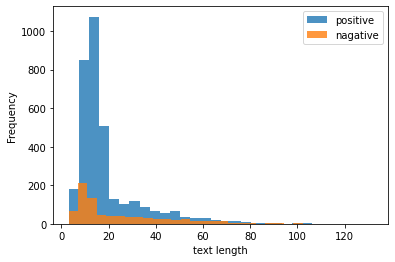

In [6]:
import matplotlib.pyplot as plt

data.query('label == "positive"')["text_len"].plot(label="positive", kind="hist", bins=30, alpha=0.8)
data.query('label == "negative"')["text_len"].plot(label="nagative", kind="hist", bins=30, alpha=0.8)

plt.xlabel("text length")
plt.legend()

## クラスと単語の関係

クラスに特徴的な単語は分類で役立つ可能性が高いです。
このステップでは、クラス毎に単語の頻度を確認して、クラスに特徴的な単語はないかを確認します。


In [7]:
# トークナイザを定義
import spacy

nlp = spacy.load("ja_core_news_md")

def tokenize(text):
    return [t.lemma_ for t in nlp(text)]

2022-05-25 08:13:47.440165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-25 08:13:47.440275: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


positiveに出現する単語をチェックしてみましょう。
単語のカウントには [collections.Counter](https://docs.python.org/ja/3/library/collections.html#collections.Counter) を使うと便利です。

In [8]:
# label毎に出現する単語をチェックする関数を定義します。

from collections import Counter


def check_words(label, most_commont=10):
    samples = data.query(f'label == "{label}"')

    cnt = Counter()
    for words in samples["text"].apply(lambda sent: tokenize(sent)):
        cnt.update(words)
        
    total = sum(cnt.values())
    
    res = []
    
    for word, count in cnt.most_common(most_commont):
        res.append((word, count, round(count/total, 4)))

    return res

In [9]:
positive_words = check_words("positive", 50)
positive_words

[('。', 3149, 0.0821),
 ('た', 2565, 0.0669),
 ('です', 1823, 0.0475),
 ('ます', 1396, 0.0364),
 ('の', 1384, 0.0361),
 ('も', 1345, 0.0351),
 ('が', 971, 0.0253),
 ('て', 956, 0.0249),
 ('だ', 909, 0.0237),
 ('、', 875, 0.0228),
 ('は', 829, 0.0216),
 ('に', 811, 0.0211),
 ('する', 740, 0.0193),
 ('で', 485, 0.0126),
 ('良い', 477, 0.0124),
 ('と', 475, 0.0124),
 ('お', 452, 0.0118),
 ('を', 366, 0.0095),
 ('部屋', 336, 0.0088),
 ('ある', 334, 0.0087),
 ('とても', 270, 0.007),
 ('また', 253, 0.0066),
 ('美味しい', 247, 0.0064),
 ('利用', 227, 0.0059),
 ('!', 223, 0.0058),
 ('いる', 221, 0.0058),
 ('たい', 212, 0.0055),
 ('満足', 206, 0.0054),
 ('ホテル', 204, 0.0053),
 ('風呂', 201, 0.0052),
 ('朝食', 199, 0.0052),
 ('思う', 196, 0.0051),
 ('できる', 170, 0.0044),
 ('から', 158, 0.0041),
 ('最高', 146, 0.0038),
 ('広い', 130, 0.0034),
 ('ない', 129, 0.0034),
 ('対応', 126, 0.0033),
 ('こと', 125, 0.0033),
 ('大', 119, 0.0031),
 ('なる', 113, 0.0029),
 ('綺麗', 113, 0.0029),
 ('よい', 112, 0.0029),
 ('行く', 109, 0.0028),
 ('いただく', 107, 0.0028),
 ('温泉', 104, 0

In [10]:
negative_words = check_words("negative", 50)
negative_words

[('。', 727, 0.059),
 ('の', 640, 0.0519),
 ('が', 638, 0.0518),
 ('た', 603, 0.0489),
 ('、', 423, 0.0343),
 ('です', 365, 0.0296),
 ('は', 344, 0.0279),
 ('に', 322, 0.0261),
 ('だ', 304, 0.0247),
 ('ます', 294, 0.0239),
 ('て', 291, 0.0236),
 ('と', 241, 0.0196),
 ('する', 217, 0.0176),
 ('も', 159, 0.0129),
 ('ない', 157, 0.0127),
 ('を', 133, 0.0108),
 ('で', 128, 0.0104),
 ('ある', 117, 0.0095),
 ('か', 112, 0.0091),
 ('残念', 109, 0.0088),
 ('.', 107, 0.0087),
 ('部屋', 103, 0.0084),
 ('お', 88, 0.0071),
 ('いる', 84, 0.0068),
 ('ぬ', 84, 0.0068),
 ('風呂', 65, 0.0053),
 ('なる', 62, 0.005),
 ('少し', 61, 0.005),
 ('思う', 60, 0.0049),
 ('ただ', 52, 0.0042),
 ('？', 50, 0.0041),
 ('朝食', 46, 0.0037),
 ('時', 44, 0.0036),
 ('から', 43, 0.0035),
 ('れる', 43, 0.0035),
 ('狭い', 40, 0.0032),
 ('てる', 37, 0.003),
 ('気', 37, 0.003),
 ('こと', 36, 0.0029),
 ('良い', 35, 0.0028),
 ('な', 32, 0.0026),
 ('方', 31, 0.0025),
 ('悪い', 30, 0.0024),
 ('ば', 30, 0.0024),
 ('・', 30, 0.0024),
 ('ちょっと', 29, 0.0024),
 ('ホテル', 27, 0.0022),
 ('しまう', 25, 0.00

結果を見ると、
positiveラベルでは「美味しい」「利用」「満足」「綺麗」「清潔」といったポジティブな単語が、
negativeラベルでは「残念」「狭い」「悪い」といったネガティブな単語が特徴的にあらわれていることがわかります。

一方で、句読点「。」や助詞「が」といった共通の単語も多く存在していることもわかります。
このような共通の単語はストップワードとして定義するとよいでしょう。